In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

np.random.seed(4)

In [2]:
def euclideanDist(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [3]:
class KMeans:
    def __init__(self, K=5, maxIters=100, plotSteps=False):
        self.K = K                  # Number of clusters       
        self.plotSteps = plotSteps  # To plot the intermediate clustering if necessary
        self.maxIters = maxIters    # Maximum number of iterations the algorithm is allowed to run if it hasn't converged yet

        # The centers (mean feature vector) for each cluster
        self.centroids = []

        # List of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        # Mean distance from all the points to their nearest centroids
        self.meanDist = 0

    def predict(self, data):
        self.data = data
        self.nSamples, self.nFeatures = data.shape
        # nSamples will hold the number of data points available while nFeatures will hold the number of features each point has
        # Eg: If we are clustering points on a 2D plane, nFeatures will be 2 (its x and y coordinates)

        # Initialize the centroids randomly
        randomSampleIndices = np.random.choice(self.nSamples, self.K, replace=False)
        self.centroids = [self.data[index] for index in randomSampleIndices]

        # Optimize the clusters iteratively
        for iteration in range(self.maxIters):
            start = time.time()

            # Assign samples to closest centroids (creating new clusters)
            self.clusters = self.createClusters(self.centroids)

            if self.plotSteps: self.plot()

            # Calculate new centroids from the newly generated clusters
            centroidsOld = self.centroids
            self.centroids = self.getCentroids(self.clusters)

            print(f"Iteration {iteration} finished in {time.time() - start} s")
            
            # Check if clusters have changed (checking for convergence)
            if self.isConverged(centroidsOld, self.centroids):
                # Calculate the mean distance of each point to its nearest centroid
                self.meanDist = self.calcMeanDist(self.centroids)

                print(f"Converged at iteration {iteration}")
                break

            if self.plotSteps:
                self.plot()

        # Classify samples as the index of their clusters
        return self.getClusterLabels(self.clusters), self.meanDist, [len(i) for i in self.clusters], self.centroids

    def getClusterLabels(self, clusters):
        # Each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.nSamples)

        for clusterIndex, cluster in enumerate(clusters):
            for sampleIndex in cluster:
                labels[sampleIndex] = clusterIndex
        return labels

    def createClusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for index, sample in enumerate(self.data):
            clusters[self.closestCentroid(sample, centroids)].append(index)
        return clusters

    def closestCentroid(self, sample, centroids):
        return np.argmin([euclideanDist(sample, point) for point in centroids])

    def getCentroids(self, clusters):
        # Assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.nFeatures))
        for clusterIndex, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.data[cluster], axis=0)
            centroids[clusterIndex] = cluster_mean
        return centroids

    def isConverged(self, centroidsOld, centroids):
        # If there is no change in the centroids, the algorithm has converged
        return sum([euclideanDist(centroidsOld[i], centroids[i]) for i in range(self.K)]) == 0 

    def calcMeanDist(self, centroids):
        # Calculatin the mean distance of every data point to its nearest centroid
        ret = 0
        for index in range(self.K):
            ret += np.sum([euclideanDist(self.data[point], centroids[index]) for point in self.clusters[index]])
        return ret/self.nSamples

    def plot(self):
        fig, ax = plt.subplots()
        for i, index in enumerate(self.clusters):
            point = self.data[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=4)
        plt.show()

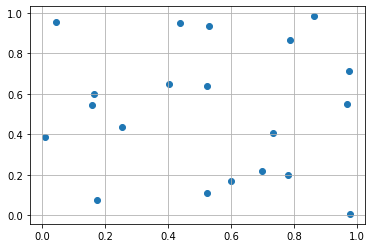

In [4]:
X = np.random.rand(20,2)
plt.scatter(X[:,0], X[:,1])
plt.grid()
plt.show()

Iteration 0 finished in 0.0017178058624267578 s
Iteration 1 finished in 0.0014309883117675781 s
Iteration 2 finished in 0.001348257064819336 s
Iteration 3 finished in 0.0014324188232421875 s
Iteration 4 finished in 0.0056056976318359375 s
Converged at iteration 4

Mean distance to nearest centroid: 0.2185228960010596 units
Number of points in each cluster: [7, 7, 6]
Ideal centroid Locations:
[[0.64033866 0.16850898]
 [0.72535328 0.80512819]
 [0.17161494 0.59505958]]


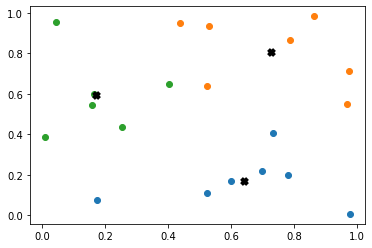

In [5]:
k = KMeans(K = 3, maxIters = 150)#, plotSteps=True)
yPred = k.predict(X)
print(f"\nMean distance to nearest centroid: {yPred[1]} units")
print(f"Number of points in each cluster: {yPred[2]}") # Number of points in each cluster
print(f"Ideal centroid Locations:\n{yPred[3]}")
k.plot()

# Trying to reach global Minima 
Since the output of the K Means clustering algorithm is very dependant on the initial random values of the centroids, we need to do multiple runs of the algorithm to find the global optima

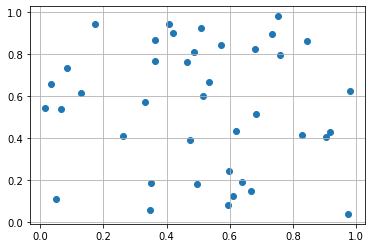

In [6]:
X = np.random.rand(40,2)
axes = plt.axes()
axes.grid()
plt.scatter(X[:,0], X[:,1])
plt.show()

In [7]:
def globalOptimum(X, trials = 10, allowUnequalGroups = True):
    k_min = KMeans(K = 3, maxIters = 150)#, plotSteps=True)
    print("Trial 0")
    yPred_min = k_min.predict(X)
    d_min = yPred_min[1]
    pointsPerCluster = np.std(yPred_min[2])
    print(f"\nMean distance to nearest centroid: {yPred_min[1]} units")
    print(f"Number of points in each cluster: {yPred_min[2]}") # Number of points in each cluster
    print(f"Ideal centroid Locations:\n{yPred_min[3]}")
    print("-----------------------------------------------------------\n")

    for trial in range(1, trials+1):
        print(f"Trial {trial}")
        k = KMeans(K = 3, maxIters = 150)#, plotSteps=True)
        yPred = k.predict(X)
        print(f"\nMean distance to nearest centroid: {yPred[1]} units")
        print(f"Number of points in each cluster: {yPred[2]}") # Number of points in each cluster
        print(f"Ideal centroid Locations:\n{yPred[3]}")
        print("-----------------------------------------------------------\n")
        d = yPred[1]
        if d < d_min and (allowUnequalGroups or (np.std(yPred[2]) < pointsPerCluster)):
            if(d <= 0): continue # Impossible case
            d_min = d
            k_min = k
            yPred_min = yPred
        else: del k

    print("\nDone!!\nBest result so far...")
    print(f"\nMean distance to nearest centroid: {yPred_min[1]} units")
    print(f"Number of points in each cluster: {yPred_min[2]}") # Number of points in each cluster
    print(f"Ideal centroid Locations:\n{yPred_min[3]}")
    k_min.plot()


Trial 0
Iteration 0 finished in 0.006464958190917969 s
Iteration 1 finished in 0.0040209293365478516 s
Iteration 2 finished in 0.002370595932006836 s
Iteration 3 finished in 0.0018715858459472656 s
Iteration 4 finished in 0.0021140575408935547 s
Iteration 5 finished in 0.0028014183044433594 s
Converged at iteration 5

Mean distance to nearest centroid: 0.20299999170732308 units
Number of points in each cluster: [15, 8, 17]
Ideal centroid Locations:
[[0.64712555 0.25749135]
 [0.1209898  0.52285504]
 [0.56253421 0.82452449]]
-----------------------------------------------------------

Trial 1
Iteration 0 finished in 0.0018639564514160156 s
Iteration 1 finished in 0.0017247200012207031 s
Iteration 2 finished in 0.0016903877258300781 s
Iteration 3 finished in 0.0017733573913574219 s
Iteration 4 finished in 0.0022912025451660156 s
Iteration 5 finished in 0.0020368099212646484 s
Converged at iteration 5

Mean distance to nearest centroid: 0.20203297822539074 units
Number of points in each cl

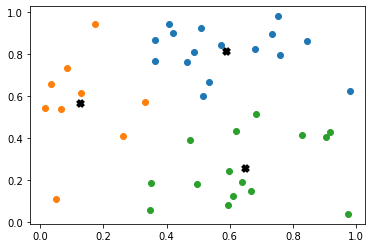

In [8]:
globalOptimum(X)

Trial 0
Iteration 0 finished in 0.0028836727142333984 s
Iteration 1 finished in 0.004842281341552734 s
Iteration 2 finished in 0.002722024917602539 s
Iteration 3 finished in 0.0033349990844726562 s
Converged at iteration 3

Mean distance to nearest centroid: 0.21994984581674162 units
Number of points in each cluster: [16, 12, 12]
Ideal centroid Locations:
[[0.69816871 0.71016597]
 [0.53484628 0.18367593]
 [0.22075237 0.7079467 ]]
-----------------------------------------------------------

Trial 1
Iteration 0 finished in 0.005076408386230469 s
Iteration 1 finished in 0.002105712890625 s
Iteration 2 finished in 0.002546548843383789 s
Iteration 3 finished in 0.002808094024658203 s
Converged at iteration 3

Mean distance to nearest centroid: 0.20203297822539074 units
Number of points in each cluster: [9, 15, 16]
Ideal centroid Locations:
[[0.12685536 0.5694918 ]
 [0.64712555 0.25749135]
 [0.58683136 0.81714566]]
-----------------------------------------------------------

Trial 2
Iteratio

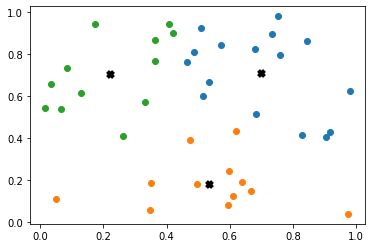

In [10]:
globalOptimum(X, allowUnequalGroups = False) # Tries to group the data into equal clusters